In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np
from collections import Counter

###<summary>
### read and process log-in data
###<return> a cleaned pandas dataframe
###<summary>

def login_data_prepare(filename = 't_login.csv'):  
    df = pd.read_csv(filename)
    df['result'] = [1 if i==1 else 0 for i in df['result']]
    df['timelong'] = [df['timelong'][i] if (df['log_from'][i]==10 or df['log_from'][i]==11) else df['timelong'][i]/1000 for i in range(df.shape[0])]
    df['timestamp_login'] = [time.mktime(time.strptime(timestr, "%Y-%m-%d %H:%M:%S")) for timestr in df['time']]
    df['uniqueday'] = [df['time'][i][5:10] for i in range(df.shape[0])]
    df['is_scan'] = [int(i) for i in df['is_scan']]

    df = df.drop(['timestamp','is_sec'], axis = 1)
    return df



%matplotlib inline
# fig = plt.figure(figsize=[20,12])
# i = 0
# for column in df_login.columns[[1,2,3,5,6,8]]:
#     ax = plt.subplot(2,3,i+1)
#     if i==0:
#         ax.hist(df_login[column].values, range=(0,1.5e+05))
#         ax.set_title(column)     
#     else:
#         ax.hist(df_login[column].values)
#         ax.set_title(column)
#     i+=1




In [2]:
df_login = login_data_prepare()
print(df_login.shape)
df_login.head(10)


(595645, 13)


,log_id,timelong,device,log_from,ip,city,result,type,id,is_scan,time,timestamp_login,uniqueday
0,2.618369e+15,5.000,879361,10,1026491,194,1,1,116825,1,2015-04-10 12:54:19,1.428685e+09,04-10
1,9.969739e+14,16.124,835072,1,1026491,194,1,1,109987,0,2015-04-12 11:20:45,1.428852e+09,04-12
2,8.123343e+15,5.000,879361,10,1026491,194,1,1,116825,1,2015-03-30 16:38:20,1.427748e+09,03-30
3,3.265677e+14,6.000,879361,10,1026491,194,1,1,116825,1,2015-04-06 16:22:18,1.428352e+09,04-06
4,6.684659e+15,4.000,879361,10,1026491,194,1,1,116825,1,2015-04-05 15:55:01,1.428264e+09,04-05
5,8.828481e+15,5.000,736541,10,1026491,194,1,1,116825,1,2015-04-05 15:48:07,1.428263e+09,04-05
6,6.071119e+15,13.000,979465,2,1026491,194,1,3,116825,0,2015-05-17 16:27:55,1.431894e+09,05-17
7,8.525176e+15,17.627,765534,1,1026491,194,1,1,109987,0,2015-03-17 17:19:04,1.426627e+09,03-17
8,3.120145e+15,12.000,12239,2,1026491,194,1,3,116825,0,2015-03-31 15:58:48,1.427832e+09,03-31
9,5.367905e+15,9.146,556157,1,1026491,194,0,1,109987,0,2015-05-10 18:06:52,1.431296e+09,05-10


In [3]:
#unreasonable timelong
negnum = sum(df_login['timelong']<0)
larnum = sum(df_login['timelong']>1.5e+3)

print('There are %d negative numbers and %d extremely large numbers for the column timelong' %(negnum, larnum))

There are 37 negative numbers and 490 extremely large numbers for the column timelong


In [4]:
###<summary>
### read and prepare trade data
###<return> two dataframe
###<return> a processed trade dataframe df_trade and a dataframe that cannot be matchecd by ID
###<summary>

def trade_data_prepare(filename = 't_trade.csv'):  
    df = pd.read_csv(filename)
    #get rid of float 
    df['time'] = [df['time'][i][:-2] for i in range(df.shape[0])]
    df['timestamp'] = [time.mktime(time.strptime(timestr, "%Y-%m-%d %H:%M:%S")) for timestr in df['time']]
    df['datetime'] = [datetime.datetime.strptime(df['time'][i], '%Y-%m-%d %H:%M:%S') for i in range(df.shape[0])]
    df['uniqueday'] = [df['time'][i][5:10] for i in range(df.shape[0])]

    id_missing = list(set(df['id']).difference(set(df_login['id'])))
    df_trade = df[~df['id'].isin(id_missing)]
    df_trade_id_missing = df[df['id'].isin(id_missing)]
    return df_trade, df_trade_id_missing

In [5]:
####distribution of the target variable####
df_trade, df_trade_id_missing = trade_data_prepare()
print(df_trade.shape)
print(df_trade_id_missing.shape)
print(df_trade['is_risk'].value_counts())
df_trade.head(10)


(132126, 7)
(593, 7)
0    128483
1      3643
Name: is_risk, dtype: int64


,rowkey,time,id,is_risk,timestamp,datetime,uniqueday
0,3,2015-01-01 00:00:41,27863,0,1.420088e+09,2015-01-01 00:00:41,01-01
1,6,2015-01-01 00:00:46,115201,0,1.420088e+09,2015-01-01 00:00:46,01-01
2,13,2015-01-01 00:01:02,143711,0,1.420088e+09,2015-01-01 00:01:02,01-01
3,32,2015-01-01 00:03:00,172699,0,1.420089e+09,2015-01-01 00:03:00,01-01
4,43,2015-01-01 00:03:52,53265,0,1.420089e+09,2015-01-01 00:03:52,01-01
5,67,2015-01-01 00:05:51,18231,0,1.420089e+09,2015-01-01 00:05:51,01-01
6,94,2015-01-01 00:10:12,147174,0,1.420089e+09,2015-01-01 00:10:12,01-01
7,98,2015-01-01 00:10:48,141674,0,1.420089e+09,2015-01-01 00:10:48,01-01
8,116,2015-01-01 00:13:16,105324,0,1.420089e+09,2015-01-01 00:13:16,01-01
9,147,2015-01-01 00:19:07,168749,0,1.420090e+09,2015-01-01 00:19:07,01-01


In [6]:
###<summary>
### match trade to its most recent log-in record
###<return> a matched dataframe
###<summary>

def trade_recent_login_match(forward = 1):
    trade_login_merge = df_trade.merge(df_login, on='id', how='left')
    df = trade_login_merge[trade_login_merge.timestamp >= trade_login_merge.timestamp_login]
    df['timediff'] = df['timestamp'] - df['timestamp_login']
    #choose the one with the smallest time difference
    trade_past_login_match = df.sort_values("timediff").groupby(["id","time_x"], as_index=False).first()
    
    if forward == 1:
        no_login_list = list(set(df_trade['rowkey']).difference(set(trade_past_login_match['rowkey'])))
        no_login_df = df_trade[df_trade['rowkey'].isin(no_login_list)]
        
        df = no_login_df.merge(df_login, on='id')
        
        df['timediff'] = df['timestamp'] - df['timestamp_login']
        trade_future_login_match = df.sort_values("timediff",ascending=False).groupby(["id","time_x"], as_index=False).first()
        condf = pd.concat([trade_past_login_match,trade_future_login_match],ignore_index=True)
        return condf
    else:
        return trade_past_login_match
    

In [7]:
df_trade_recent_login = trade_recent_login_match(forward = 1)
print(df_trade_recent_login.shape)
df_trade_recent_login.head()

/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(132126, 20)


,id,time_x,rowkey,is_risk,timestamp,datetime,uniqueday_x,log_id,timelong,device,log_from,ip,city,result,type,is_scan,time_y,timestamp_login,uniqueday_y,timediff
0,5,2015-04-21 20:34:11,560306,0,1.429663e+09,2015-04-21 20:34:11,04-21,7.010986e+15,6.0,781684,2,505101,400,1,3,0,2015-04-21 20:21:59,1.429662e+09,04-21,732.0
1,6,2015-04-01 12:06:11,472263,0,1.427904e+09,2015-04-01 12:06:11,04-01,5.088796e+15,8.0,703894,2,1289501,238,1,3,0,2015-02-23 18:57:22,1.424736e+09,02-23,3168529.0
2,6,2015-04-01 12:14:59,472301,0,1.427905e+09,2015-04-01 12:14:59,04-01,5.088796e+15,8.0,703894,2,1289501,238,1,3,0,2015-02-23 18:57:22,1.424736e+09,02-23,3169057.0
3,6,2015-04-01 15:30:27,473131,0,1.427917e+09,2015-04-01 15:30:27,04-01,5.088796e+15,8.0,703894,2,1289501,238,1,3,0,2015-02-23 18:57:22,1.424736e+09,02-23,3180785.0
4,6,2015-04-01 15:31:38,473135,0,1.427917e+09,2015-04-01 15:31:38,04-01,5.088796e+15,8.0,703894,2,1289501,238,1,3,0,2015-02-23 18:57:22,1.424736e+09,02-23,3180856.0


In [8]:
#merge trade sameday info 
trade_merge = df_trade.merge(df_trade, on=['id','uniqueday'])
trade_merge['timediff'] = trade_merge['timestamp_x'] - trade_merge['timestamp_y']


In [9]:
#merge trade all info
trade_merge_all = df_trade.merge(df_trade, on='id')
trade_merge_all['timediff'] = trade_merge_all['timestamp_x'] - trade_merge_all['timestamp_y']


In [10]:
###<summary>
### time difference from last trade and next trade
###<return> a dataframe inclued time dfference
###<summary>

def trade_time_diff(time_range):
    #time_range takes value in past or future, past represents last trade, future represents next trade
    if time_range == 'last':
        trade_merge_last = trade_merge_all[trade_merge_all['timediff'] > 0]
        time_diff_ltrade = trade_merge_last.sort_values("timediff").groupby(["id","rowkey_x"], as_index=False).first()
        find_time_diff = time_diff_ltrade.loc[:,['id','rowkey_x','timediff']]
    else:
        trade_merge_next = trade_merge_all[trade_merge_all['timediff'] < 0]
        time_diff_ntrade = trade_merge_next.sort_values("timediff",ascending=False).groupby(["id","rowkey_x"], as_index=False).first()
        find_time_diff = time_diff_ntrade.loc[:,['id','rowkey_x','timediff']]
        find_time_diff['timediff'] = find_time_diff['timediff'].abs()
    
    find_time_diff['timediff'] = [1/find_time_diff['timediff'][i] for i in range(find_time_diff.shape[0])]
    st = time_range + '_trade' + '_timediff'
    find_time_diff = find_time_diff.rename(columns = {'rowkey_x': 'rowkey', 'timediff': st})
    return find_time_diff

In [11]:
###<summary>
### trade times in the same day/hour/ten minutes before/after this trade  
### total trade times in the same day/hour/ten minutes of this trade 
###<return> a dataframe that include all such features
###<summary>

def trade_times(time_range, time_long):
    #time_range stands for past, future, or all; time_long stands for day, hour, or ten minites
    if time_long == 'day':
        trade_past = trade_merge[trade_merge['timediff'] >= 0] if time_range == 'past' else trade_merge[trade_merge['timediff'] <= 0] if time_range == 'future' else trade_merge
    if time_long == 'hour':
        trade_past = trade_merge[(trade_merge['timediff']<=3600) & (trade_merge['timediff']>=0)] if time_range == 'past' else trade_merge[(trade_merge['timediff'] >= -3600) & (trade_merge['timediff']<=0)] if time_range == 'future' else trade_merge[(trade_merge['timediff']<=1800) & (trade_merge['timediff']>=-1800)] 
    if time_long == 'ten_minutes':
        trade_past = trade_merge[(trade_merge['timediff'] <= 600) & (trade_merge['timediff']>=0)] if time_range == 'past' else trade_merge[(trade_merge['timediff'] >= -600) & (trade_merge['timediff']<=0)] if time_range == 'future' else trade_merge[(trade_merge['timediff']<=300) & (trade_merge['timediff']>=-300)] 
    
        
    find_counts = trade_past.sort_values("timediff").groupby(["id","rowkey_x"], as_index=False).timediff.count()
    st = time_range + '_' + time_long + '_trade'
    find_counts = find_counts.rename(columns = {'rowkey_x': 'rowkey', 'timediff': st})
    find_counts[st] = [find_counts[st][i] -1 if time_range != 'all' else find_counts[st][i] for i in range(find_counts.shape[0])]
    return find_counts
    
#     new_df = df.merge(find_counts.drop('uniqueday', axis = 1), on=['id','time'])
#     new_df[st] = [new_df[st][i] -1 if time_range != 'all' else new_df[st][i] for i in range(new_df.shape[0])]
#     return new_df

In [12]:
###<summary>
### Add trade times and login times features to our data frame
###<return> a merged dataframe
###<summary>

def add_features(df_origin, df_features):
    df = df_origin.merge(df_features, on = ['id','rowkey'], how = 'left')
    return df

In [13]:
####add times features####
count = 0
for tr in ['future', 'past', 'all']:
    for tl in ['day', 'hour', 'ten_minutes']:
        trade_time_features = trade_times(tr, tl)
        if count == 0:
            df_tt = add_features(df_trade_recent_login, trade_time_features)
            count += 1
        else:
            df_tt = add_features(df_tt, trade_time_features)

In [14]:
####add trade time difference features####
for tr in ['last', 'next']:
    trade_time_diff_features = trade_time_diff(tr)
    df_tt = add_features(df_tt, trade_time_diff_features)



In [15]:
######determine if a trade happens at midnight######
df_tt['if_midnight']= [1 if (df_tt['datetime'][i].hour>=1) & (df_tt['datetime'][i].hour<=6) else 0 for i in range(df_tt.shape[0])]
df_tt = df_tt.fillna(0)

In [16]:
#merge trade and login sameday info 
trade_login_merge_sameday = df_trade.merge(df_login, on=['id','uniqueday'])
trade_login_merge_sameday['timediff'] = trade_login_merge_sameday['timestamp'] - trade_login_merge_sameday['timestamp_login']


In [17]:
###<summary>
### log-in times in the same day/hour/ten minutes before/after the trade  
### total log-in times in the same day/hour/ten minutes of this trade
###<return> a dataframe that include all such features  
###<summary>

def login_times(time_range, time_long):
    #time_range stands for past, future, or all; time_long stands for day, hour, or ten minites
    if time_long == 'day':
        login_past = trade_login_merge_sameday[trade_login_merge_sameday['timediff'] >= 0] if time_range == 'past' else trade_login_merge_sameday[trade_login_merge_sameday['timediff'] <= 0] if time_range == 'future' else trade_login_merge_sameday
    if time_long == 'hour':
        login_past = trade_login_merge_sameday[(trade_login_merge_sameday['timediff']<=3600) & (trade_login_merge_sameday['timediff']>=0)] if time_range == 'past' else trade_login_merge_sameday[(trade_login_merge_sameday['timediff']>=-3600) & (trade_login_merge_sameday['timediff']<=0)] if time_range == 'future' else trade_login_merge_sameday[(trade_login_merge_sameday['timediff']<=1800) & (trade_login_merge_sameday['timediff']>=-1800)] 
    if time_long == 'ten_minutes':
        login_past = trade_login_merge_sameday[(trade_login_merge_sameday['timediff']<=600) & (trade_login_merge_sameday['timediff']>=0)] if time_range == 'past' else trade_login_merge_sameday[(trade_login_merge_sameday['timediff']>=-600) & (trade_login_merge_sameday['timediff']<=0)] if time_range == 'future' else trade_login_merge_sameday[(trade_login_merge_sameday['timediff']<=300) & (trade_login_merge_sameday['timediff']>=-300)] 
    
        
    find_counts = login_past.sort_values("timediff").groupby(["id","rowkey"], as_index=False).timediff.count()
    st = time_range + '_' + time_long + '_login'
    find_counts = find_counts.rename(columns = {'timediff': st})
    
    return find_counts

#     new_df = df.merge(find_counts.drop('uniqueday', axis = 1), on=['id','time'], how = 'left')
# #    new_df[st] = [new_df[st][i] -1 if time_range != 'all' else new_df[st][i] for i in range(new_df.shape[0])]
#     new_df = new_df.fillna(0)

#     return new_df

In [18]:
### total trade times in ten minutes/an hour before/after each trade
### total log-in times in ten minutes/an hour before/after each trade
count = 0
for tr in ['future', 'past', 'all']:
    for tl in ['day', 'hour', 'ten_minutes']:
        login_time_features = login_times(tr, tl)
        if count == 0:
            df_tt_lt = add_features(df_tt, login_time_features)
            df_tt_lt = df_tt_lt.fillna(0)
            count += 1
        else:
            df_tt_lt = add_features(df_tt_lt, login_time_features)
            df_tt_lt = df_tt_lt.fillna(0)

In [19]:
#create a new log-in df with float entries so we can calculate the mode, mean and group by id
df_login_info = df_login.drop(['time','timestamp_login','log_id','uniqueday'], axis = 1)
df_login_info.head(5)

,timelong,device,log_from,ip,city,result,type,id,is_scan
0,5.000,879361,10,1026491,194,1,1,116825,1
1,16.124,835072,1,1026491,194,1,1,109987,0
2,5.000,879361,10,1026491,194,1,1,116825,1
3,6.000,879361,10,1026491,194,1,1,116825,1
4,4.000,879361,10,1026491,194,1,1,116825,1


In [20]:
###<summary>
### extract probability features to our dataSet
###<return> a dataframe include probability features.
###<summary> 
def loginfo(dfgroup, colname):
    probTable = dfgroup[colname].apply(pd.value_counts, normalize = (True, ))
    return probTable

###<summary>
### add probability features to our dataSet
###<return> a merged dataset
###<summary>

def add_recent_login_features(df_origin, df_features):
    columns = df_features.drop(['id','timelong'],axis=1).columns
    dfgroup = df_features.groupby('id')
    for column in columns:
        dictAll = loginfo(dfgroup, colname = column)
        ids = df_origin['id']
        colVals = df_origin[column]
        lst = list(map(
            lambda args: dictAll[args[0]].get(int(args[1])),
            zip(ids, colVals)
        ))
        st = column + '_prob'
        df_origin[st] = lst
    return df_origin
        

In [21]:
df_tt_lt_rl = add_recent_login_features(df_tt_lt,df_login_info)
#add timelong mean and diff feature
timelong_m = df_login_info[['timelong','id']].groupby('id').mean()
timelong_m['id'] = timelong_m.index
timelong_m.columns = ['timelong_mean','id']
df_tt_lt_rl = df_tt_lt_rl.merge(timelong_m, on = 'id', how = 'left')
df_tt_lt_rl['timelong_diff'] = df_tt_lt_rl['timelong'] - df_tt_lt_rl['timelong_mean']
df_tt_lt_rl.columns

Index(['id', 'time_x', 'rowkey', 'is_risk', 'timestamp', 'datetime',
       'uniqueday_x', 'log_id', 'timelong', 'device', 'log_from', 'ip', 'city',
       'result', 'type', 'is_scan', 'time_y', 'timestamp_login', 'uniqueday_y',
       'timediff', 'future_day_trade', 'future_hour_trade',
       'future_ten_minutes_trade', 'past_day_trade', 'past_hour_trade',
       'past_ten_minutes_trade', 'all_day_trade', 'all_hour_trade',
       'all_ten_minutes_trade', 'last_trade_timediff', 'next_trade_timediff',
       'if_midnight', 'future_day_login', 'future_hour_login',
       'future_ten_minutes_login', 'past_day_login', 'past_hour_login',
       'past_ten_minutes_login', 'all_day_login', 'all_hour_login',
       'all_ten_minutes_login', 'device_prob', 'log_from_prob', 'ip_prob',
       'city_prob', 'result_prob', 'type_prob', 'is_scan_prob',
       'timelong_mean', 'timelong_diff'],
      dtype='object')

In [22]:
###<summary>
### the device number in same id
###<return> integer
###<summary> 

def produce_dev_num_of_id():
    dev_num = pd.DataFrame(df_login.groupby('id')['device'].nunique())
    dev_num['id'] = dev_num.index
    dev_num = dev_num.reset_index(drop=True)
    dev_num = dev_num.rename(columns = {'device': 'device_num'})
    return dev_num

###<summary>
### how many id in same device.
###<return> integer
###<summary> 
def produce_id_num_of_dev():
    id_num = pd.DataFrame(df_login.groupby('device')['id'].nunique())
    id_num['device'] = id_num.index
    id_num = id_num.reset_index(drop=True)
    id_num = id_num.rename(columns = {'id': 'id_num_of_dev'})
    return id_num

###<summary>
### how many device log-in the same ip
###<return> integer
###<summary> 
def produce_dev_num_of_ip():
    ip_merge_login = df_login.drop(['log_id','timelong','log_from','city','result','type','is_scan'],axis=1).merge(df_login.drop(['log_id','timelong','log_from','city','result','type','is_scan'],axis=1), on=['ip','uniqueday'])
    ip_merge_login['timediff'] = ip_merge_login['timestamp_login_x'] - ip_merge_login['timestamp_login_y']
    ip_merge_login = ip_merge_login[(ip_merge_login['timediff']<=1800) & (ip_merge_login['timediff']>=-1800)]
    dev_num_ip = pd.DataFrame(ip_merge_login.groupby(['ip','time_x'])['device_x'].nunique())
    dev_num_ip.reset_index(inplace=True)
    dev_num_ip = dev_num_ip.rename(columns = {'time_x': 'time_y','device_x':'dev_num_of_ip'})
    return dev_num_ip

In [23]:
####produce devices features####
dev_num_of_id = produce_dev_num_of_id()
id_num_of_dev = produce_id_num_of_dev()
dev_num_of_ip = produce_dev_num_of_ip()

In [24]:
###<summary>
### add dev_num_of_id, id_num_of_dev and dev_num_of_ip features to our dataframe
###<return> a merged dataframe
###<summary> 

def add_device_features(df_origin, df_features, onList):
    df = df_origin.merge(df_features,on=onList, how = 'left')
    return df


In [25]:
#add device features
df_tt_lt_rl = add_device_features(df_tt_lt_rl,id_num_of_dev, onList = 'device')
df_tt_lt_rl = add_device_features(df_tt_lt_rl,dev_num_of_id, onList = 'id')
df_tt_lt_rl = add_device_features(df_tt_lt_rl,dev_num_of_ip, onList = ['ip','time_y'])


In [26]:
#################make a copy of final dataSet#######################
dataSet = df_tt_lt_rl.copy()
print(dataSet.shape)

(132126, 53)


In [27]:
###<summary>
### split the data into training and testing set in time sequence
###<return> four dataframes
###<summary>

def split_dataSet(dataSet):
    X = dataSet.drop(['ip','time_x','time_y','timestamp','uniqueday_x','uniqueday_y','log_id','timestamp_login','is_risk'],axis = 1)
    Y = dataSet.loc[:,['is_risk','rowkey']]
    #we want to cut the training set by time
    X['trade_month'] = [X['datetime'][i].month for i in range(X.shape[0])]
    X['trade_day'] = [X['datetime'][i].day for i in range(X.shape[0])]
    test_index = X[(X['trade_month']==6) & (X['trade_day']>=15)].index
    train_index = X[(X['trade_month']<6)|((X['trade_month']==6)&(X['trade_day']<=15))].index

    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]

    X_train = X_train.drop(['id','trade_month','trade_day','datetime'], axis = 1)
    X_test = X_test.drop(['id','trade_month','trade_day','datetime'],  axis =1 )
    X_train.set_index('rowkey',inplace=True)
    X_test.set_index('rowkey',inplace=True)
    y_train.set_index('rowkey',inplace=True)
    y_test.set_index('rowkey',inplace=True)
    return X_train, X_test, y_train, y_test


In [28]:
X_train, X_test, y_train, y_test = split_dataSet(dataSet)

In [29]:
X_train.head()

,timelong,device,log_from,city,result,type,is_scan,timediff,future_day_trade,future_hour_trade,...,ip_prob,city_prob,result_prob,type_prob,is_scan_prob,timelong_mean,timelong_diff,id_num_of_dev,device_num,dev_num_of_ip
rowkey,,,,,,,,,,,,,,,,,,,,,
560306,6.0,781684,2,400,1,3,0,732.0,0,0,...,0.500000,0.5,0.750000,1.0,1.0,23.408250,-17.408250,1,3,1
472263,8.0,703894,2,238,1,3,0,3168529.0,3,1,...,0.111111,1.0,0.444444,1.0,1.0,7.888889,0.111111,1,3,1
472301,8.0,703894,2,238,1,3,0,3169057.0,2,0,...,0.111111,1.0,0.444444,1.0,1.0,7.888889,0.111111,1,3,1
473131,8.0,703894,2,238,1,3,0,3180785.0,1,1,...,0.111111,1.0,0.444444,1.0,1.0,7.888889,0.111111,1,3,1
473135,8.0,703894,2,238,1,3,0,3180856.0,0,0,...,0.111111,1.0,0.444444,1.0,1.0,7.888889,0.111111,1,3,1


In [30]:
#########tuning; (90,2)gives the best result######### 
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import RandomForestClassifier

n_estimators_adj = list(range(50,150,20))
max_features = list(range(2,10,2))

for value in n_estimators_adj:
    for o in max_features:
        clf = RandomForestClassifier(n_estimators=value,max_features = o ,random_state=20, class_weight='balanced')
        clf.fit(X_train,y_train)
        test_pred = clf.predict(X_test)
        f_beta_score = fbeta_score(y_true = y_test,y_pred = test_pred, beta = 0.1)
        print(value, o, f_beta_score)


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


50 2 0.797068771139


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


50 4 0.830964846672


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


50 6 0.793193717277


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


50 8 0.723251895535


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


70 2 0.854002254791


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


70 4 0.801009372747


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


70 6 0.72283669486


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


70 8 0.745532245532


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


90 2 0.862326574173


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


90 4 0.793193717277


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


90 6 0.773138482951


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


90 8 0.745532245532


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


110 2 0.862326574173


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


110 4 0.830964846672


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


110 6 0.747141896436


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


110 8 0.745532245532


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


130 2 0.869807497467


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


130 4 0.793193717277


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


130 6 0.764599855804


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


130 8 0.775666936136


In [31]:
from sklearn.metrics import confusion_matrix
import itertools

###<summary>
### draw a precision confusion matrix
###<return> precision confusion matrix
###<summary>
def plot_confusion_matrix_precision(cm, classes,
                          normalize=True,
                          title='Precision Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=0)[np.newaxis,:]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap,aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
###<summary>
### draw a recall confusion matrix
###<return> recall confusion matrix
###<summary>

def plot_confusion_matrix_recall(cm, classes,
                          normalize=True,
                          title='Recall Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap,aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

###<summary>
### combine both confusion matrixs
###<return> two confusion matrix
###<summary>

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print(cm)
    fig = plt.figure(figsize = (10,5))# Changed the size of the figure, just aesthetic
    plt.subplot(1,2,1)

    plot_confusion_matrix_precision(cm, classes,
                          normalize=True,
                          cmap=plt.cm.Blues)
    plt.subplot(1,2,2)

    plot_confusion_matrix_recall(cm, classes,
                          normalize=True,
                          cmap=plt.cm.Blues)

In [32]:
#############Using InstanceHardnessThreshold to down-sampling###########
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold(random_state=20, estimator=LogisticRegression())
X_resampled, y_resampled = iht.fit_sample(X_train,y_train)


/Users/sunan/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
clf = RandomForestClassifier(random_state=20,class_weight='balanced')
clf.fit(X_resampled, y_resampled)
predict = clf.predict(X_train)
f_beta_score = fbeta_score(y_true = y_train,y_pred = predict, beta = 0.1)
print(f_beta_score,sum(test_pred))

0.0431303512942 23


[[37424 77776]
 [    3  3471]]


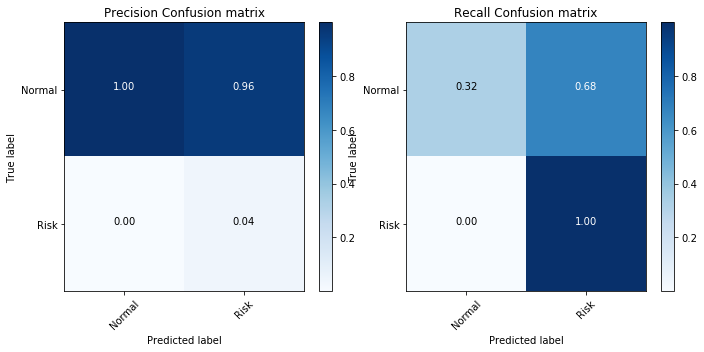

In [34]:
class_names = ['Normal','Risk']

cnf_matrix = confusion_matrix(y_train, predict)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix')

plt.show()

In [35]:
newX_train = X_train[predict!= 0]
newy_train = y_train[predict!= 0]

In [36]:
clf = RandomForestClassifier(random_state=20, class_weight='balanced')
clf.fit(newX_train,newy_train)
newtest_pred = clf.predict(X_test)
f_beta_score = fbeta_score(y_true = y_test,y_pred = newtest_pred, beta = 0.1)
print(f_beta_score,sum(newtest_pred))

/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.717651458489 25


[[14156     6]
 [  155    19]]


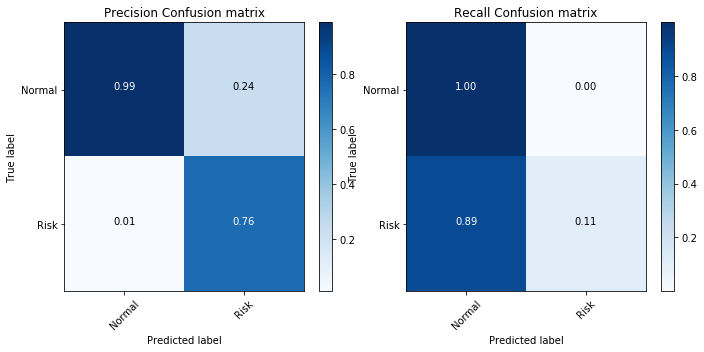

In [37]:
class_names = ['Normal','Risk']

cnf_matrix = confusion_matrix(y_test, newtest_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix')

plt.show()

In [38]:
########adjust n_stimators########
n_estimators_adj = list(range(50,150,20))
max_features = list(range(2,10,2))

for value in n_estimators_adj:
    for o in max_features:
        clf = RandomForestClassifier(n_estimators=value,max_features = o ,random_state=20, class_weight='balanced')
        clf.fit(newX_train,newy_train)
        newtest_pred = clf.predict(X_test)
        f_beta_score = fbeta_score(y_true = y_test,y_pred = newtest_pred, beta = 0.1)
        print (value, o, f_beta_score)

/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


50 2 0.808340353833


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


50 4 0.755057167986


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


50 6 0.784770784771


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


50 8 0.669051404346


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


70 2 0.775666936136


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


70 4 0.764599855804


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


70 6 0.850884582982


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


70 8 0.604599873976


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


90 2 0.784770784771


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


90 4 0.850884582982


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


90 6 0.843887423043


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


90 8 0.628630705394


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


110 2 0.808340353833


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


110 4 0.876567020251


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


110 6 0.882704691812


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


110 8 0.660795168596


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


130 2 0.799472295515


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


130 4 0.893428812131


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


130 6 0.888302550572


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


130 8 0.660795168596


In [39]:
########adjust n_stimators########
n_estimators_adj = list(range(30,220,20))
max_features = list(range(1,4,1))

for value in n_estimators_adj:
    for o in max_features:
        clf = RandomForestClassifier(n_estimators=value,max_features = o ,random_state=20, class_weight='balanced')
        clf.fit(newX_train,newy_train)
        newtest_pred = clf.predict(X_test)
        f_beta_score = fbeta_score(y_true = y_test,y_pred = newtest_pred, beta = 0.1)
        print (value, o, f_beta_score)

/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


30 1 0.767477203647


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


30 2 0.816491511722


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


30 3 0.799472295515


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


50 1 0.818642350557


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


50 2 0.808340353833


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


50 3 0.808340353833


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


70 1 0.854002254791


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


70 2 0.775666936136


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


70 3 0.824009324009


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


90 1 0.905017921147


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


90 2 0.784770784771


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


90 3 0.824009324009


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


110 1 0.910935738444


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


110 2 0.808340353833


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


110 3 0.824009324009


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


130 1 0.910935738444


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


130 2 0.799472295515


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


130 3 0.824009324009


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


150 1 0.862326574173


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


150 2 0.843887423043


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


150 3 0.830964846672


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


170 1 0.862326574173


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


170 2 0.850884582982


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


170 3 0.830964846672


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


190 1 0.910935738444


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


190 2 0.843887423043


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


190 3 0.824009324009


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


210 1 0.910935738444


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


210 2 0.850884582982


/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


210 3 0.824009324009


In [52]:
clf = RandomForestClassifier(n_estimators=110 ,max_features = 1 ,random_state=20, class_weight='balanced')
clf.fit(newX_train,newy_train)
newtest_pred = clf.predict(X_test)
f_beta_score = fbeta_score(y_true = y_test,y_pred = newtest_pred, beta = 0.1)
print(f_beta_score,sum(newtest_pred))

/Users/sunan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.910935738444 16


[[14162     0]
 [  158    16]]


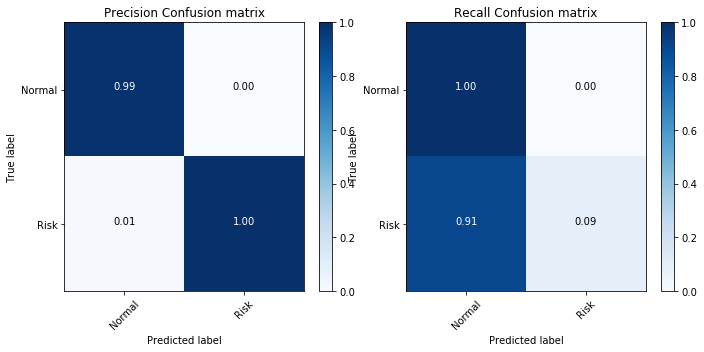

In [53]:
class_names = ['Normal','Risk']

cnf_matrix = confusion_matrix(y_test, newtest_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix')

plt.show()

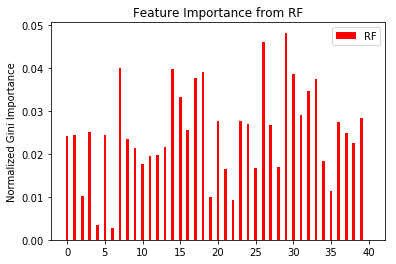

In [54]:
%matplotlib inline

cols = list(range(newX_train.shape[1]))
rf_fi = clf.feature_importances_
#dt_fi = clf_def.feature_importances_

fig, ax = plt.subplots()
width=0.35

ax.bar(np.arange(len(cols)), rf_fi, width, color='r', label='RF')
#ax.bar(np.arange(len(cols))+width, dt_fi, width, color='b', label='DT')
#ax.set_ylim([0,0.0005])
#ax.set_xticks(np.arange(len(cols)))
#ax.set_xticklabels(cols, rotation=45)
plt.title('Feature Importance from RF')
ax.set_ylabel('Normalized Gini Importance')
plt.legend(loc=1)

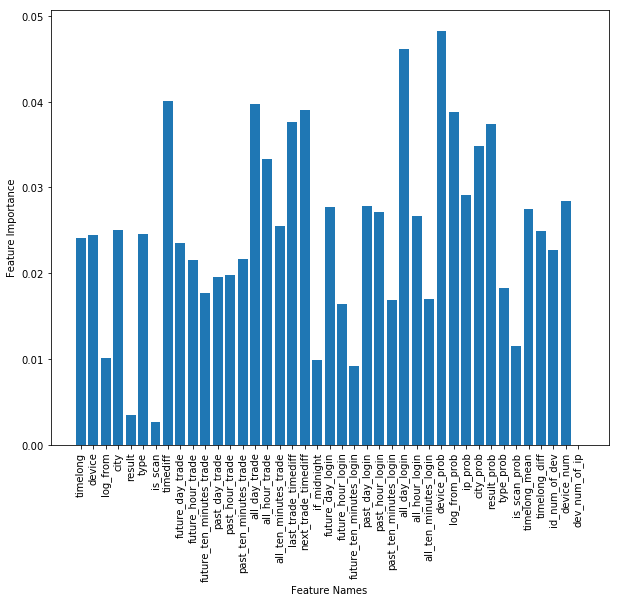

In [55]:
######feature importance#######
plt.rcParams['figure.figsize'] = 10, 8
y_pos = np.arange(X_train.shape[1])
plt.bar(y_pos,clf.feature_importances_)
plt.xticks(y_pos, X_train.columns,rotation = 'vertical')
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')